<a href="https://colab.research.google.com/github/AtifQureshi110/NLP/blob/main/sentiment_analysis_covid19_tweets_with_neattext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [ ]:
# EDA pamages 
import pandas as pd
#hide earrings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from textblob import TextBlob
from pandas.io.json import json_normalize
from collections import Counter 
#pip install wordcloud
from wordcloud import WordCloud
import re

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

# **Dataset**

In [ ]:
# a function that read csv file meanwhile make copy of original dataset.
def read_csv_and_copy(file_path, new_name):
    print("Reading CSV file...")
    df = pd.read_csv(file_path)#,encoding='latin-1')
    print("Making a copy of the DataFrame...")
    df_copy = df.copy()
    globals()[new_name] = df_copy
    print(f"Copied DataFrame assigned to variable {new_name}")
    return df_copy
read_csv_and_copy(r"/content/drive/MyDrive/NLP/covid19_tweets.csv", "covid19_tweets_df")

Reading CSV file...
Making a copy of the DataFrame...
Copied DataFrame assigned to variable covid19_tweets_df


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [ ]:
covid19_tweets_df.is_retweet.value_counts()
"""
it shows that all tweets are not True 
the target is to find which tweets are True, False and natural b/c that the sentiment analysis
by neattext is one technique to result although others as well which can be try with other dataset."""

False    179108
Name: is_retweet, dtype: int64

In [ ]:
# to see which column has null value.
covid19_tweets_df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [ ]:
# here droping all null values.
covid19_tweets_df.dropna(inplace=True)
display(len(covid19_tweets_df))

99138

#Text data summarization 
- it is the process of condensing and extracting the most important information from a piece of text while removing any redundant or irrelevant information. 
- This can help to improve the efficiency of data processing and analysis, as well as make it easier to understand and communicate the key insights and findings from the text data.

In [ ]:
# the whole dataset is converted into lowercase()
covid19_tweets_df = covid19_tweets_df.apply(lambda x: x.astype(str).str.lower()) 
display(covid19_tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,false,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,['covid19'],twitter for android,false
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,false,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,['covid19'],twitter for iphone,false
4,dipr-j&k,jammu and kashmir,🖊️official twitter handle of department of inf...,2017-02-12 06:45:15,101009,168,101,false,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"['coronavirusupdates', 'covid19']",twitter for android,false
5,🎹 franz schubert,новоро́ссия,🎼 #новоро́ссия #novorossiya #оставайсядома #s...,2018-03-19 16:29:52,1180,1071,1287,false,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",twitter web app,false
6,hr bartender,"gainesville, fl",workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,false,2020-07-25 12:27:03,how #covid19 will change work in general (and ...,"['covid19', 'recruiting']",buffer,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,new jersey herald,"newton, nj","the new jersey herald, a daily newspaper in ne...",2010-01-07 18:19:37,6274,162,38,false,2020-08-29 19:44:27,wallkill school nurse adds covid-19 monitoring...,"['nurses', 'covid19', 'coronavirus', 'schools']",socialnewsdesk,false
179102,pris,t.o.,"a/v/l techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,false,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19'],twitter web app,false
179103,ajimati abdulrahman o.,"ilorin, nigeria",animal scientist|| muslim|| real madrid/chelsea,2013-12-30 18:59:19,412,1609,1062,false,2020-08-29 19:44:21,thanks @iamohmai for nominating me for the @wh...,['wearamask'],twitter for android,false
179104,jason,ontario,when your cat has more baking soda than ninja ...,2011-12-21 04:41:30,150,182,7295,false,2020-08-29 19:44:16,2020! the year of insanity! lol! #covid19 http...,['covid19'],twitter for android,false


In [ ]:
# total length of dataset.
len(covid19_tweets_df)

99138

In [ ]:
# taking only the text column from dataset.
covid19_tweets_df.text

2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
5         #coronavirus #covid19 deaths continue to rise....
6         how #covid19 will change work in general (and ...
                                ...                        
179101    wallkill school nurse adds covid-19 monitoring...
179102    we have reached 25mil cases of #covid19, world...
179103    thanks @iamohmai for nominating me for the @wh...
179104    2020! the year of insanity! lol! #covid19 http...
179106    more than 1,200 students test positive for #co...
Name: text, Length: 99138, dtype: object

In [ ]:
# it would be possible that the index of dataset would have the poper order so to adjust them reset_index() helps 
covid19_tweets_df.reset_index(inplace=True)

In [ ]:
corpus = []
for i in range(0, len(covid19_tweets_df)):
    review = re.sub('[^a-zA-Z]', ' ', covid19_tweets_df['text'][i]).lower().split()
    #review = review.lower().split()
    corpus.append(review)
corpus

[['diane',
  'wdunlap',
  'realdonaldtrump',
  'trump',
  'never',
  'once',
  'claimed',
  'covid',
  'was',
  'a',
  'hoax',
  'we',
  'all',
  'claim',
  'that',
  'this',
  'effort',
  'to',
  'https',
  't',
  'co',
  'jkk',
  'vhwhb'],
 ['brookbanktv',
  'the',
  'one',
  'gift',
  'covid',
  'has',
  'give',
  'me',
  'is',
  'an',
  'appreciation',
  'for',
  'the',
  'simple',
  'things',
  'that',
  'were',
  'always',
  'around',
  'me',
  'https',
  't',
  'co',
  'z',
  'poalfxcw'],
 ['july',
  'media',
  'bulletin',
  'on',
  'novel',
  'coronavirusupdates',
  'covid',
  'kansalrohit',
  'drsyedsehrish',
  'airnewsalerts',
  'ani',
  'https',
  't',
  'co',
  'mn',
  'eecsjhh'],
 ['coronavirus',
  'covid',
  'deaths',
  'continue',
  'to',
  'rise',
  'it',
  's',
  'almost',
  'as',
  'bad',
  'as',
  'it',
  'ever',
  'was',
  'politicians',
  'and',
  'businesses',
  'want',
  'https',
  't',
  'co',
  'hxmhooxx',
  'c'],
 ['how',
  'covid',
  'will',
  'change',
  'wo

In [ ]:
'''
The function 'get_clean_data_column' extracts and cleans a new column from the original data by removing 
emojis, numbers, punctuations, special characters, stop words, URLs, addresses, terms in bracket, phone numbers, HTML tags, and currency symbols. '''
def get_clean_data_column (new_column_name , column_name ):
    covid19_tweets_df[new_column_name] = covid19_tweets_df[column_name].apply(nfx.remove_emojis)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_numbers)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_punctuations)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_special_characters)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_multiple_spaces)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_stopwords)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_urls)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_visacard_addr)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_terms_in_bracket)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_street_address)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_puncts)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_postoffice_box)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_phone_numbers)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_html_tags)
    covid19_tweets_df[new_column_name] = covid19_tweets_df[new_column_name].apply(nfx.remove_currency_symbols)
    return covid19_tweets_df[new_column_name]

In [ ]:
'''
This function uses a dictionary to define column names and their corresponding data, and then iterates through the dictionary
to clean the data using a custom function. '''
dict_names = {'cleaning_text':'text'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    get_clean_data_column(i,j)

In [ ]:
'''this shows the difference'''
covid19_tweets_df[['text','cleaning_text']]

,text,cleaning_text
0,@diane3443 @wdunlap @realdonaldtrump trump nev...,diane wdunlap realdonaldtrump trump claimed co...
1,@brookbanktv the one gift #covid19 has give me...,brookbanktv gift covid appreciation simple thi...
2,25 july : media bulletin on novel #coronavirus...,july media bulletin novel coronavirusupdates c...
3,#coronavirus #covid19 deaths continue to rise....,coronavirus covid deaths continue rise bad pol...
4,how #covid19 will change work in general (and ...,covid change work general recruiting specifica...
...,...,...
99133,wallkill school nurse adds covid-19 monitoring...,wallkill school nurse adds covid monitoring da...
99134,"we have reached 25mil cases of #covid19, world...",reached mil cases covid worldwide oofhttpstcoi...
99135,thanks @iamohmai for nominating me for the @wh...,thanks iamohmai nominating wearamask challenge...
99136,2020! the year of insanity! lol! #covid19 http...,year insanity lol covid httpstcoynpyzgn


In [ ]:
"""
This function uses the TextBlob library to analyze the sentiment of a text input.
It calculates the polarity and subjectivity of the text and assigns a sentiment label of "Positive", "Negative", or "Natural" 
based on the polarity score. The function then returns a dictionary containing the polarity, subjectivity, and sentiment label as key-value pairs."""
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0 :
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Natural'
    result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
    return result

In [ ]:
# firstly this line of code apply the get_Sentiment function on cleaning_text of dataset then create a completly new column to save Sentiment results
covid19_tweets_df['sentiment_results'] = covid19_tweets_df['cleaning_text'].apply(get_sentiment)

In [ ]:
covid19_tweets_df['sentiment_results']

0        {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
1        {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
2        {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3        {'Polarity': -0.6999999999999998, 'Subjectivit...
4        {'Polarity': 0.05000000000000002, 'Subjectivit...
                               ...                        
99133    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
99134    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
99135    {'Polarity': 0.2, 'Subjectivity': 0.2, 'Sentim...
99136    {'Polarity': 0.8, 'Subjectivity': 0.7, 'Sentim...
99137    {'Polarity': 0.14488636363636365, 'Subjectivit...
Name: sentiment_results, Length: 99138, dtype: object

In [ ]:
"""
This code line is joining the `sentiment_results` column of the `covid19_tweets_df` dataframe with a normalized version of the same column,
which is converted from JSON to a tabular format using `pd.json_normalize()`. 
The resulting tabular format allows the sentiment results to be easily analyzed and compared with other columns in the dataframe. 
The `join()` method is used to combine the normalized data with the original dataframe using a left join, 
so that any non-matching rows in the normalized data will have null values in the corresponding columns of the combined dataframe."""
covid19_tweets_df = covid19_tweets_df.join(pd.json_normalize(covid19_tweets_df['sentiment_results']))

In [ ]:
def get_pnn_text(name_of_pnn):
    pnn_tweet = covid19_tweets_df[covid19_tweets_df['Sentiment']==name_of_pnn]['cleaning_text']
    return pnn_tweet

In [ ]:
natural_text  =get_pnn_text('Natural')
negative_text = get_pnn_text('Negative')
positive_text = get_pnn_text('Positive')

In [ ]:
natural_text

0        diane wdunlap realdonaldtrump trump claimed co...
1        brookbanktv gift covid appreciation simple thi...
2        july media bulletin novel coronavirusupdates c...
5        pope god prophet sadhu sundar selvaraj watch h...
6        order httpstconurgxemalogo graphicdesigner log...
                               ...                        
99128    library cats covid pandemic coronavirus caturd...
99131    nba daysnot funddevelop covid testbuttheir pla...
99132    wallkill school nurse adds covid monitoring da...
99133    wallkill school nurse adds covid monitoring da...
99134    reached mil cases covid worldwide oofhttpstcoi...
Name: cleaning_text, Length: 51153, dtype: object

In [ ]:
''' this function to takes all 3 type of text which are pos, neg and nat than remove stopwords from them further it converts them into list'''
def get_text_list(tweet_list_name):
    tweet_list_name = tweet_list_name.apply(nfx.remove_stopwords).tolist()
    return tweet_list_name

In [ ]:
natural_text_list = get_text_list(natural_text)
positive_text_list = get_text_list(positive_text)
negative_text_list = get_text_list(negative_text)
natural_text_list

['diane wdunlap realdonaldtrump trump claimed covid hoax claim effort httpstcojkkvhwhb',
 'brookbanktv gift covid appreciation simple things httpstcozpoalfxcw',
 'july media bulletin novel coronavirusupdates covid kansalrohit drsyedsehrish airnewsalerts ani httpstcomneecsjhh',
 'pope god prophet sadhu sundar selvaraj watch httpstcoxrtykvji hurricanehanna covid httpstcodzcgunwl',
 'order httpstconurgxemalogo graphicdesigner logodesign logodesinger icon minimalist abstract httpstcoypmogqis',
 'nagaland police covid awareness city tower junction dimapurcovid keepsocialdistance httpstcowovfmqhueo',
 'second wave covid flandersback homework httpstcoswimzacmn',
 'comprehensive review wash amp covidanalysis key ways wash help reduce transmission httpstcoecsfdmob',
 'holy water times covid httpstcoyazyxl',
 'kolarneed blood type bpositiveat jalappa hospitalblood component need plasma bve covid recove httpstcoxtgxulcz',
 'munitions response team bosniaandherzegovina modified ops adopted masks d

In [ ]:
# this function basically perform tokenazation operation which break each sentence of list into single word
def get_token (function_name):
    tokens = [token for line in function_name for token in line.split()]
    return tokens

In [ ]:
natural_text_token = get_token(natural_text_list)
negative_text_token = get_token(negative_text_list)
positive_text_token = get_token(positive_text_list)
natural_text_token

['diane',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'claimed',
 'covid',
 'hoax',
 'claim',
 'effort',
 'httpstcojkkvhwhb',
 'brookbanktv',
 'gift',
 'covid',
 'appreciation',
 'simple',
 'things',
 'httpstcozpoalfxcw',
 'july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'covid',
 'kansalrohit',
 'drsyedsehrish',
 'airnewsalerts',
 'ani',
 'httpstcomneecsjhh',
 'pope',
 'god',
 'prophet',
 'sadhu',
 'sundar',
 'selvaraj',
 'watch',
 'httpstcoxrtykvji',
 'hurricanehanna',
 'covid',
 'httpstcodzcgunwl',
 'order',
 'httpstconurgxemalogo',
 'graphicdesigner',
 'logodesign',
 'logodesinger',
 'icon',
 'minimalist',
 'abstract',
 'httpstcoypmogqis',
 'nagaland',
 'police',
 'covid',
 'awareness',
 'city',
 'tower',
 'junction',
 'dimapurcovid',
 'keepsocialdistance',
 'httpstcowovfmqhueo',
 'second',
 'wave',
 'covid',
 'flandersback',
 'homework',
 'httpstcoswimzacmn',
 'comprehensive',
 'review',
 'wash',
 'amp',
 'covidanalysis',
 'key',
 'ways',
 'wash',
 'help',
 'reduce'

In [ ]:
def get_most_commn_words(docx,nums=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(nums)
    result = dict(most_common)
    return result

In [ ]:
natural_m_c_w = get_most_commn_words(natural_text_token)
negative_m_c_w = get_most_commn_words(negative_text_token)
positive_m_c_w = get_most_commn_words(positive_text_token)
natural_m_c_w

{'covid': 40999,
 'coronavirus': 4758,
 'cases': 3087,
 'amp': 2948,
 'pandemic': 2757,
 'people': 1976,
 'deaths': 1923,
 'health': 1364,
 'need': 1327,
 'india': 1301,
 'vaccine': 1247,
 'today': 1027,
 'help': 992,
 'like': 982,
 'trump': 932,
 'mask': 932,
 'dont': 925,
 'world': 900,
 'august': 871,
 'day': 859,
 'news': 854,
 'lockdown': 852,
 'realdonaldtrump': 840,
 'testing': 826,
 'global': 823,
 'th': 808,
 'corona': 794,
 'death': 784,
 'time': 776,
 'spread': 770}

In [ ]:
def get_most_common_4_df (words):
    most_common = get_most_commn_words(words)
    user_info_df = pd.DataFrame(most_common.items(),columns=['words','score'])
    return user_info_df

In [ ]:
positive_m_c_4_df = get_most_common_4_df(positive_m_c_w)
negative_m_c_4_df = get_most_common_4_df(negative_m_c_w)
natural_m_c_4_df = get_most_common_4_df(natural_m_c_w)
natural_m_c_4_df

,words,score
0,covid,40999
1,coronavirus,4758
2,cases,3087
3,amp,2948
4,pandemic,2757
5,people,1976
6,deaths,1923
7,health,1364
8,need,1327
9,india,1301


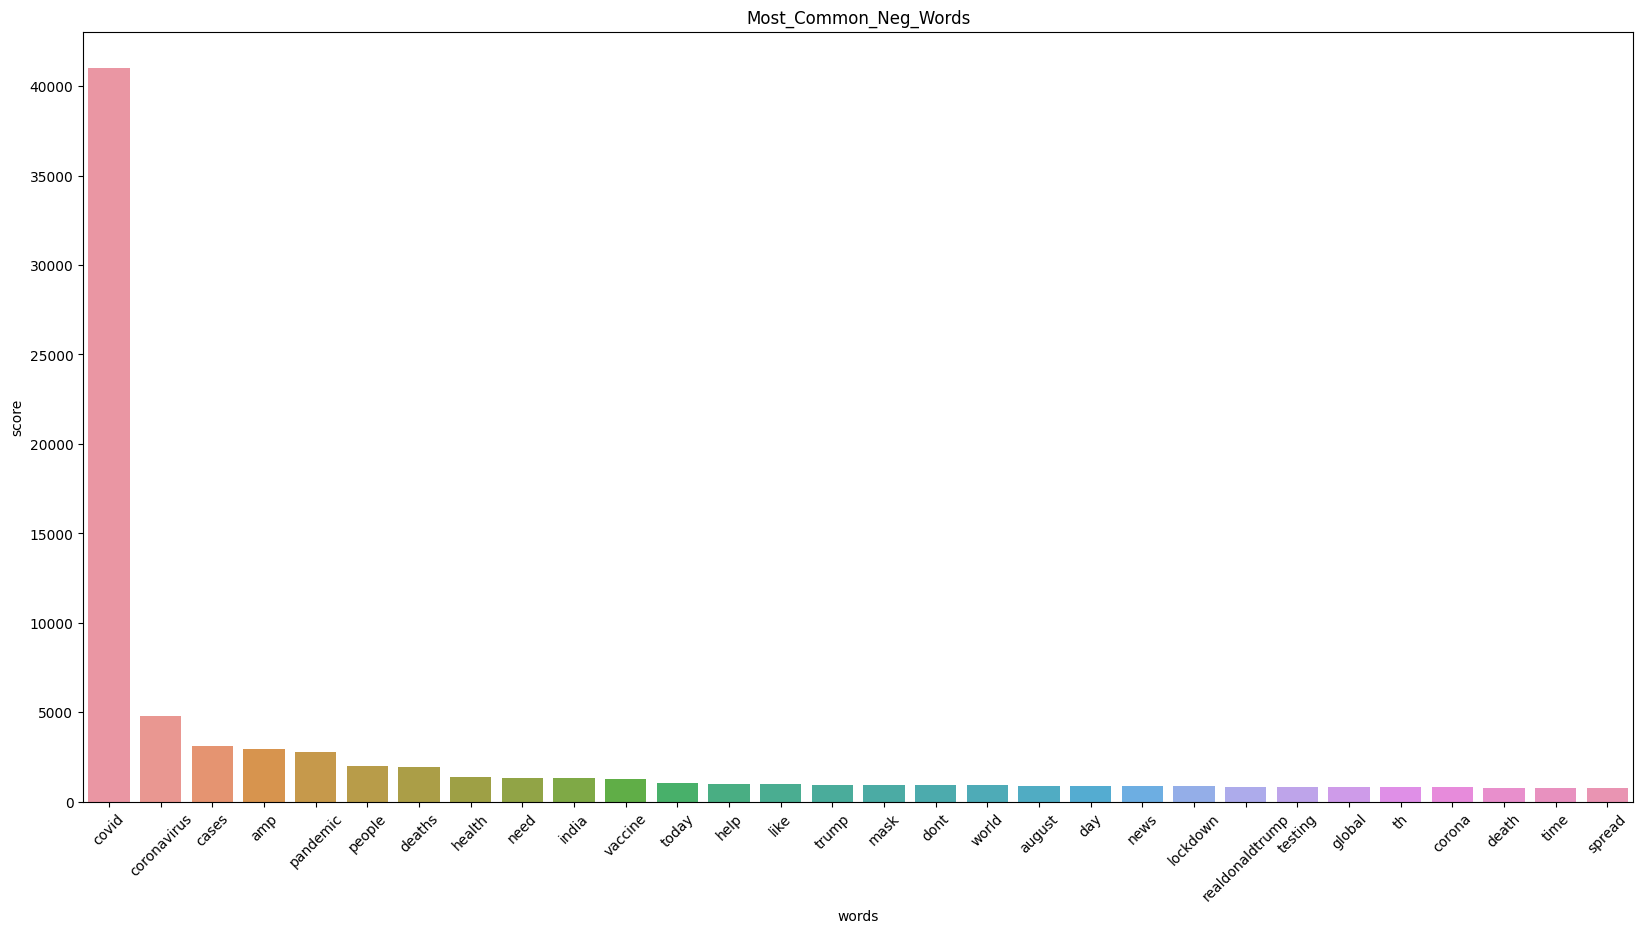

In [ ]:
#plot with sea bone
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='score',data=natural_m_c_4_df)#we can use here positive and natural_m_c_4_df
plt.xticks(rotation=45)
plt.title("Most_Common_Neg_Words")
plt.show()

In [ ]:
def plot_wordcloud(docx):
    my_wordcloud = WordCloud().generate(docx)
    plt.imshow(my_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(positive_text_token)
neg_docx = ' '.join(negative_text_token)
nat_docx = ' '.join(natural_text_token)

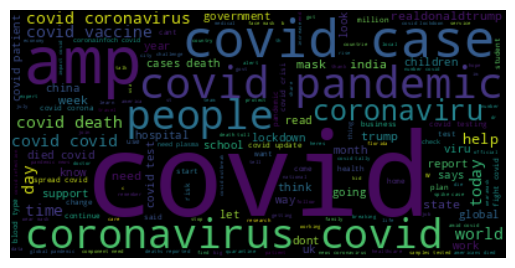

In [ ]:
plot_wordcloud(nat_docx)#WE CALL OTHER TWOAS WELL 

In [ ]:
covid19_tweets_df[['cleaning_text', 'Polarity',	'Subjectivity',	'Sentiment']]

,cleaning_text,Polarity,Subjectivity,Sentiment
0,diane wdunlap realdonaldtrump trump claimed co...,0.000000,0.000000,Natural
1,brookbanktv gift covid appreciation simple thi...,0.000000,0.357143,Natural
2,july media bulletin novel coronavirusupdates c...,0.000000,0.000000,Natural
3,coronavirus covid deaths continue rise bad pol...,-0.700000,0.666667,Negative
4,covid change work general recruiting specifica...,0.050000,0.500000,Positive
...,...,...,...,...
99133,wallkill school nurse adds covid monitoring da...,0.000000,0.000000,Natural
99134,reached mil cases covid worldwide oofhttpstcoi...,0.000000,0.000000,Natural
99135,thanks iamohmai nominating wearamask challenge...,0.200000,0.200000,Positive
99136,year insanity lol covid httpstcoynpyzgn,0.800000,0.700000,Positive
